In [1]:
import sympy as sp
import control as ct
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('maroon_ipynb.mplstyle')

Example from lecture 13.

In [2]:
Rs, Rf, R, C, s = sp.symbols('R_s R_f R C s')
Vo, Vi, V1, V2 = sp.Function('V_o')(s), sp.Function('V_i')(s), sp.Function('V1')(s), sp.Function('V2')(s)

eq1 = sp.Eq(V1, -Rf/Rs*Vi)
eq2 = sp.Eq(V2, -V1)
eq3 = sp.Eq((V2 - Vo)/R - Vo/(1/(C*s)), 0)
display(eq1, eq2, eq3)

Eq(V1(s), -R_f*V_i(s)/R_s)

Eq(V2(s), -V1(s))

Eq(-C*s*V_o(s) + (V2(s) - V_o(s))/R, 0)

In [3]:
sol = sp.solve([eq1, eq2, eq3], [Vo, V1, V2], dict=True)[0]
tf = sol[Vo]/Vi
tf

R_f/(C*R*R_s*s + R_s)

In [4]:
values = [
    (Rf, 10_000),
    (Rs, 1_000),
    (R, 100),
    (C, sp.S('100e-6'))
]

tf_subs = tf.subs(values)
tf_subs

10000/(10.0*s + 1000)

In [5]:
sys1 = ct.tf(10_000, [10, 1000])
sys1

TransferFunction(array([10000]), array([  10, 1000]))

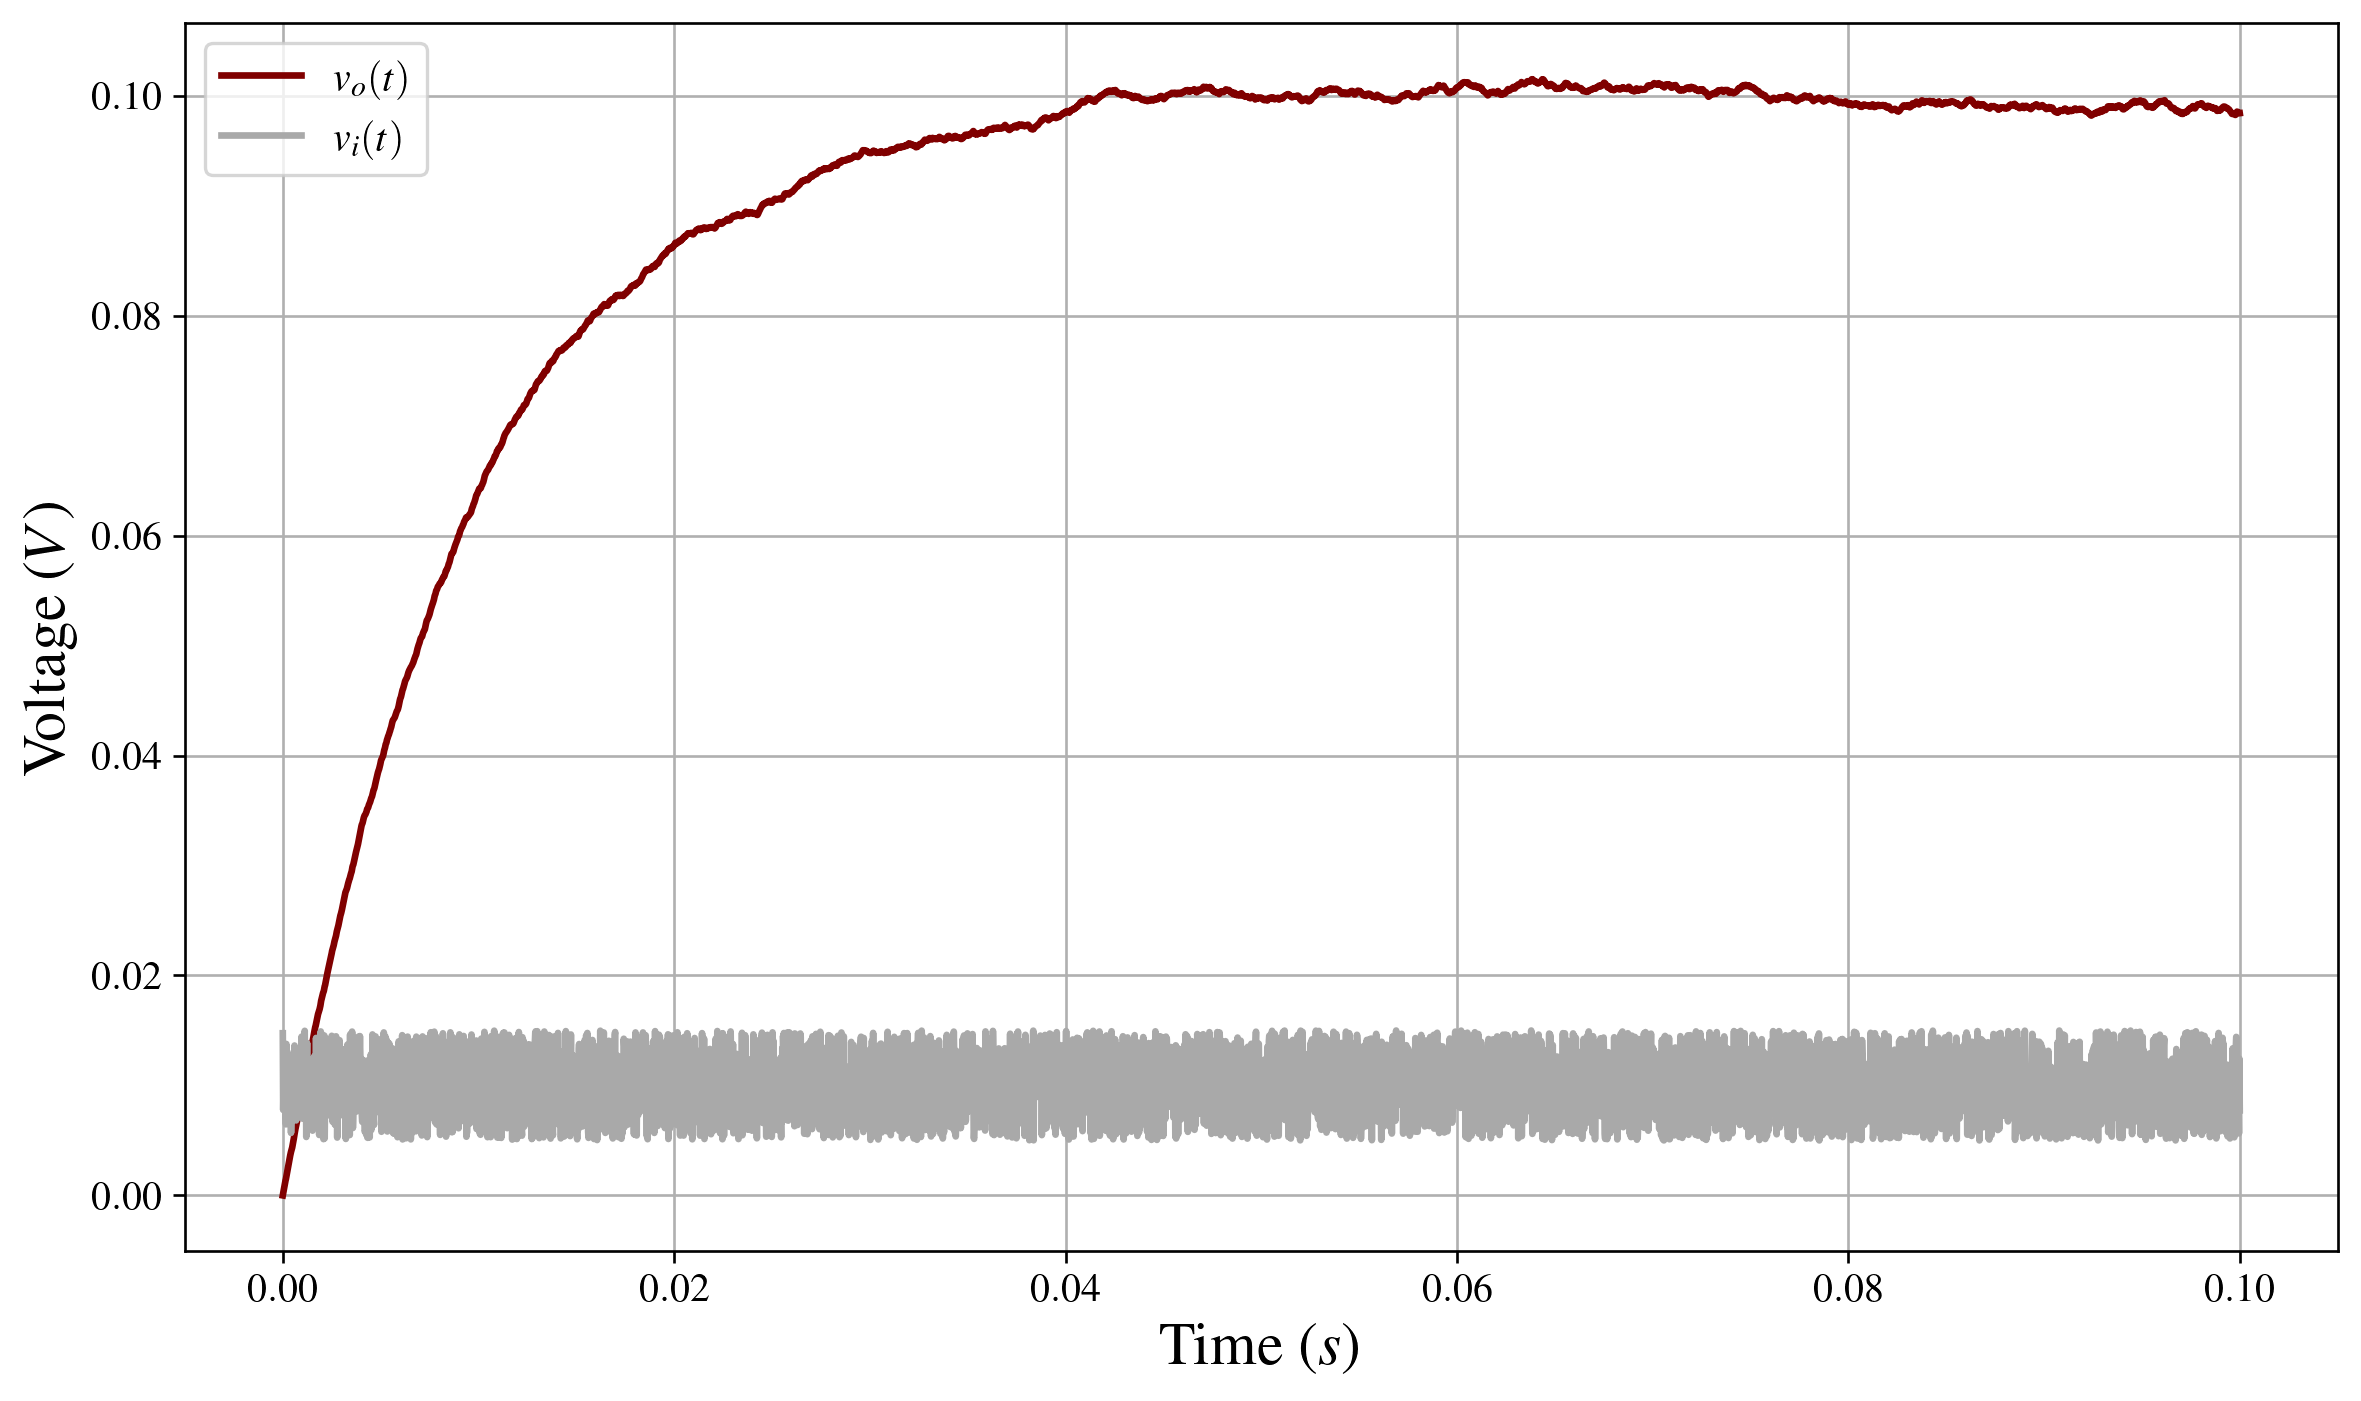

In [6]:
t_array = np.linspace(0, 0.1, 5_000)
noise = np.random.uniform(-5/1000, 5/1000, t_array.shape)
vi = np.full(t_array.shape, 10/1000) + noise
_, response = ct.forced_response(sys1, T=t_array, U=vi)

fig, ax = plt.subplots()

ax.plot(t_array, response, label='$v_o(t)$')
ax.plot(t_array, vi, color='darkgrey', label='$v_i(t)$')
ax.set_ylabel('Voltage ($V$)')
ax.set_xlabel('Time ($s$)')
ax.legend()
plt.show()